 Ce document pr√©sente un premier mod√®le de d√©tection de raquette en se basant

sur l'architecture YOLOv5. 
**L'architecture YOLOv5 peut √™tre sch√©matis√©e de la mani√®re suivante**  :
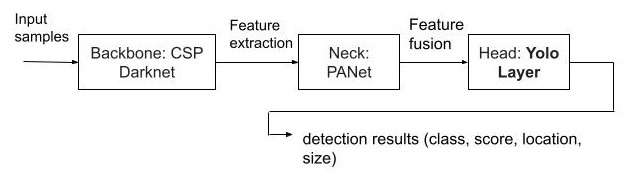


 **Elle se compose de trois parties : (1) Backbone : CSPDarknet, (2) Neck : PANet et (3) Head : Yolo Layer**. Les donn√©es sont d'abord entr√©es dans CSPDarknet pour l'extraction de caract√©ristiques, puis transmises √† PANet pour la fusion de caract√©ristiques. Enfin, Yolo Layer g√©n√®re des r√©sultats de d√©tection (classe, score, emplacement, taille) (comme le montre la figure ci-dessus).
Notre d√©marche de d√©tection peut √™tre r√©sum√©e en 3 √©tapes essentielles :
 

*  Choix d'une vid√©o support de la d√©tection  et la d√©couper en plusieurs frames.
*   Annotation des images, d√©compostion des images annot√©es en data d'entra√Ænement, data de validation et data de test ( avec le moins de biais possible).
*  Entra√Ænement du mod√®le, mesure des performances du mod√®le sur une vid√©o et identification de ses limites en vue de l'am√©liorer. 



In [ ]:
# Vid√©o utilis√©e comme support de d√©tection
import IPython
url='https://www.youtube.com/watch?v=UAXvXMUe6uM&ab_channel=LBWTableTennis'
def windows_open(url):
    IPython.display.display(IPython.display.Javascript('window.open("{url}");'.format(url=url)))



In [ ]:
windows_open(url)

<IPython.core.display.Javascript object>

**La 1 √®re √©tape qu'on a faite est qu'on a import√© une vid√©o d'un match de tennis de table( voir la vid√©o en √©x√©cutant le code ci-dessus)**.
**C'est le match de Tristan Flore contre Timo Boll**.
 **Ensuite, Roboflow r√©alise son d√©coupage en plusieurs frames (en moyenne de 2 frames/s), ce qui nous fait environ 450 images**.
**On a alors essay√© d'annoter ces images par Roboflow**.
**Lien vers le site d'annotation roboflow et notre projet nomm√© raquette avec les annotations faites et la base d'images utilis√©es** :https://universe.roboflow.com/ecole-centrale-de-lyon/raquette






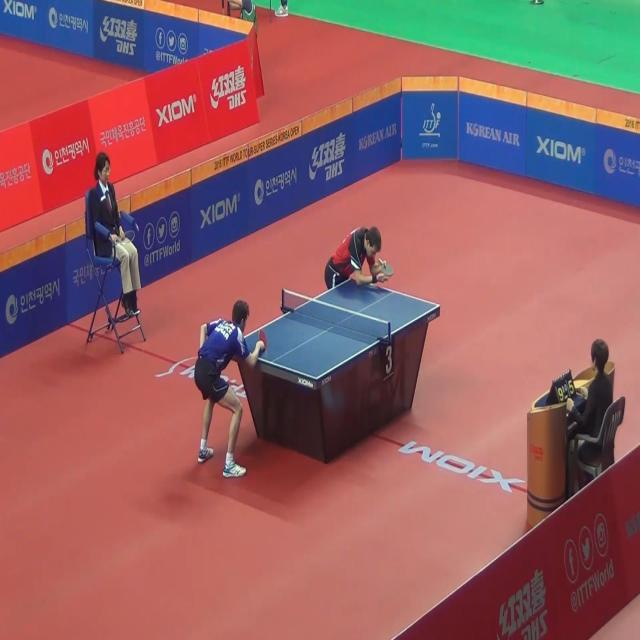

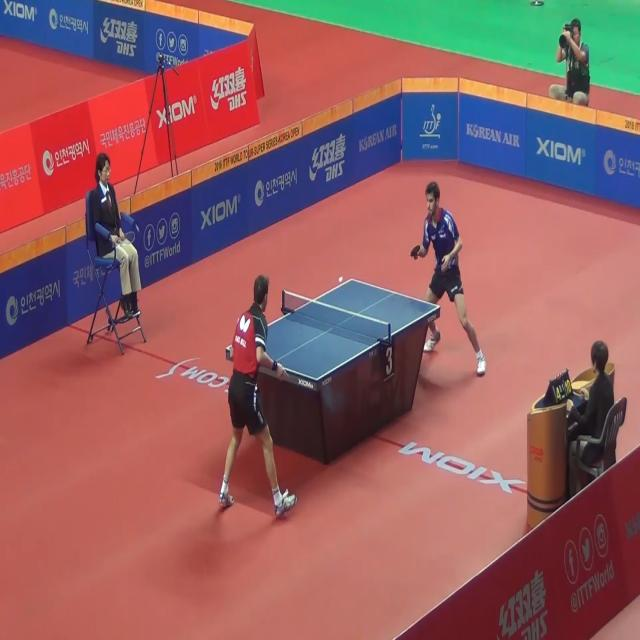

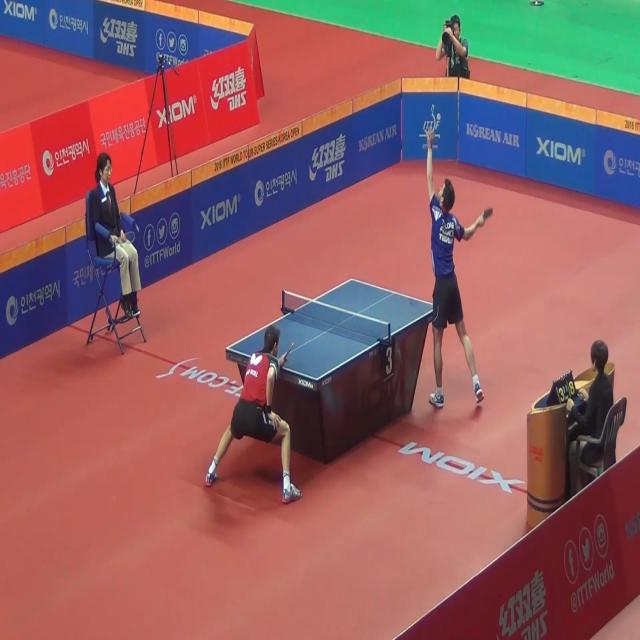

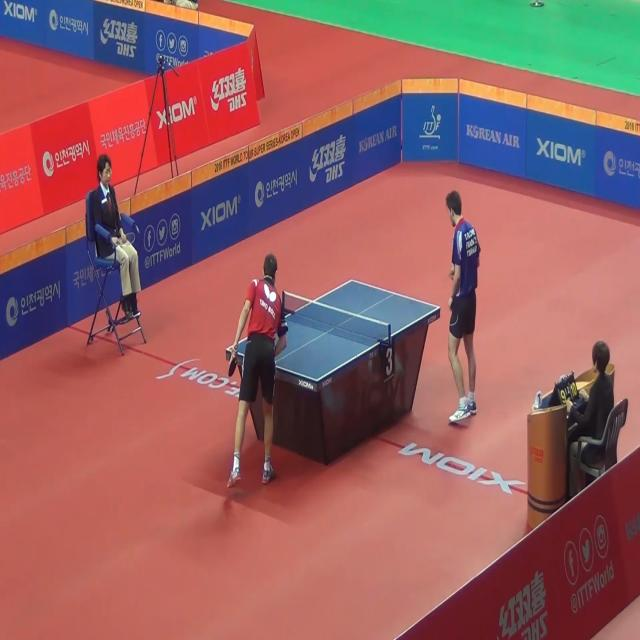

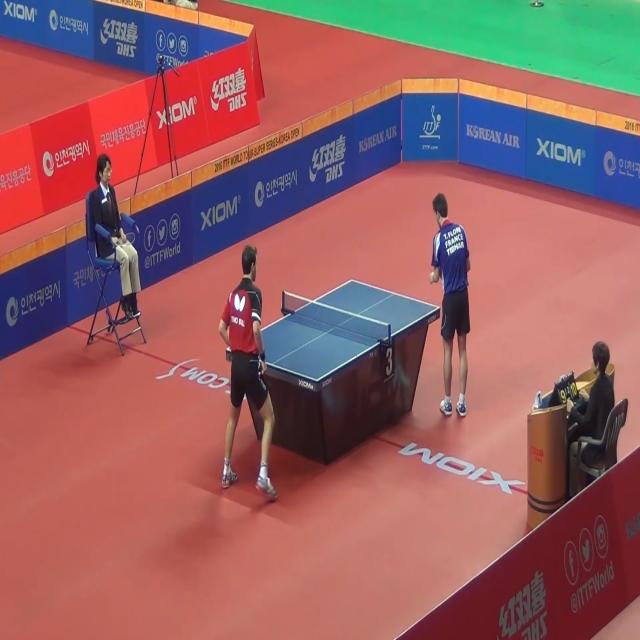

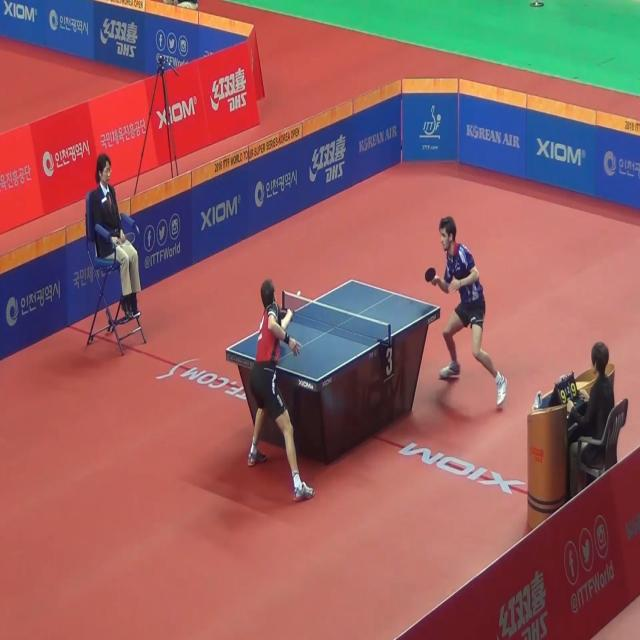

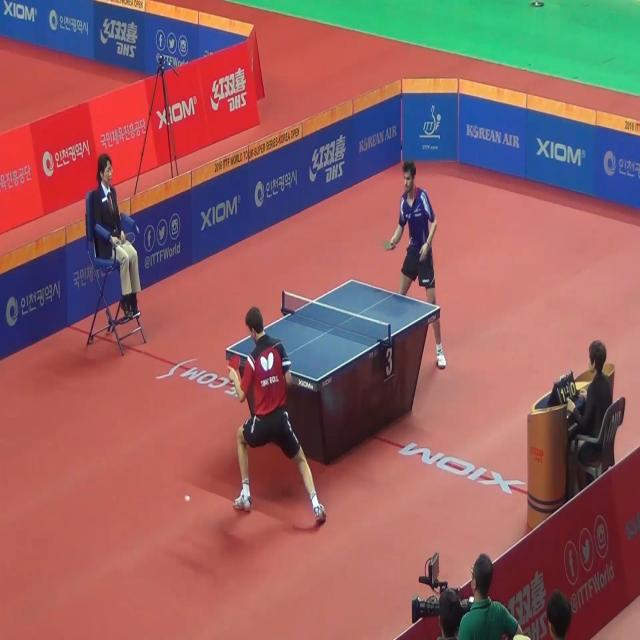

In [ ]:
       

from IPython.display import Image
import os
path1 = 'Test/'       

listing = os.listdir(path1)
for file in listing[:7]:
    #read the image
    im = Image(path1+ file,width=500, height=500)    
    #show image
    display(im)     



**Ensuite, on a essay√© d'annoter les images avec RobotFlow.Ces annotations √©taient plus au moins difficiles selon la position, l'orientation et la visibilit√© ou non de la raquette.(voir quelques images annot√©es en ex√©cutant le code ci-dessous).**

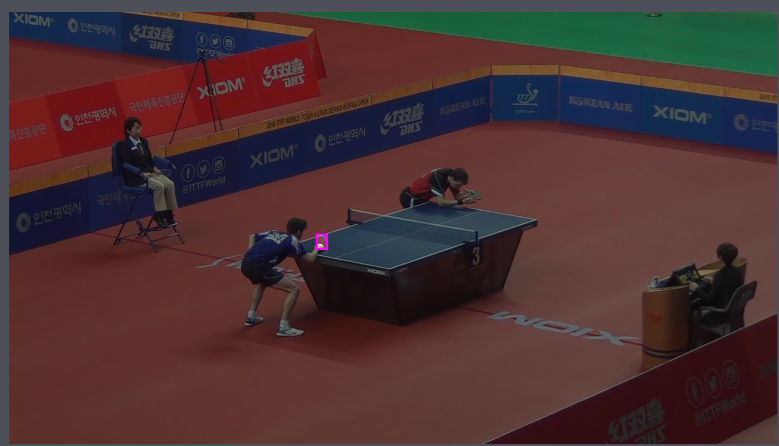

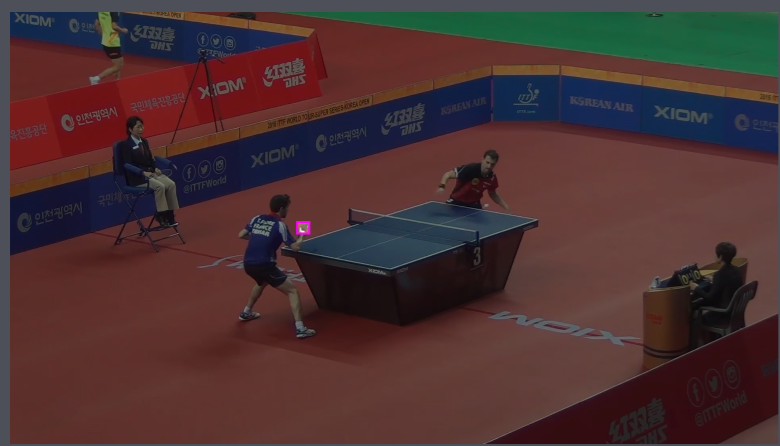

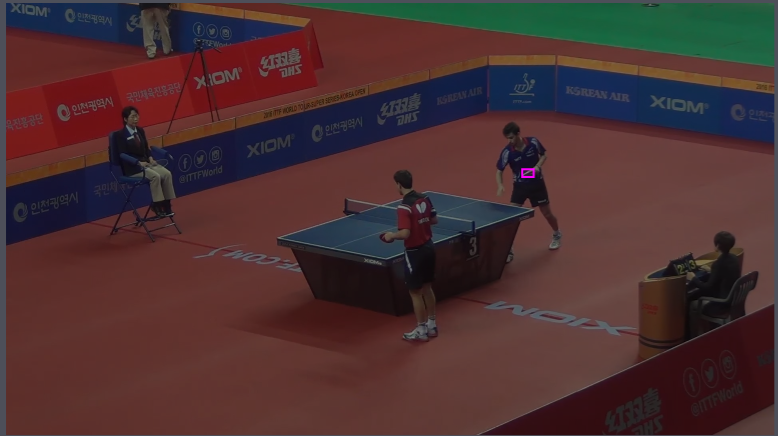

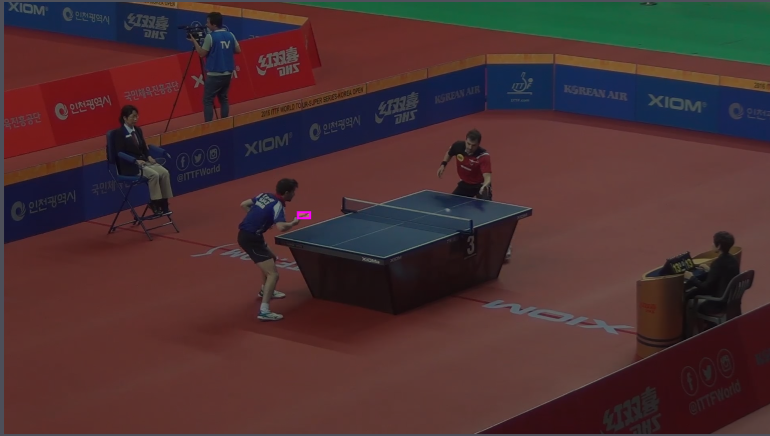

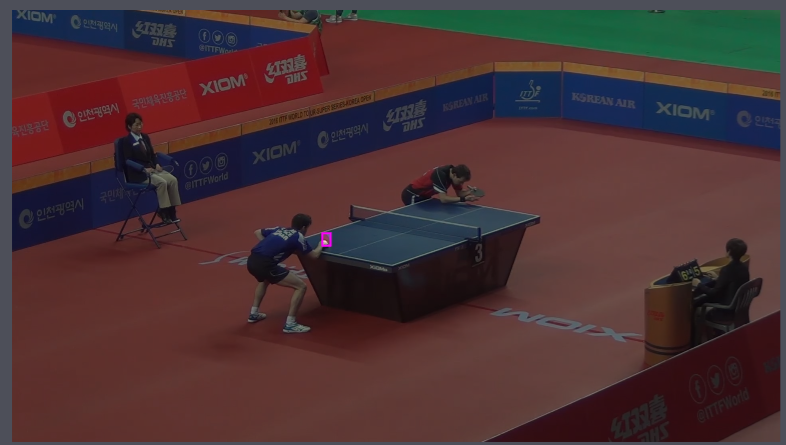

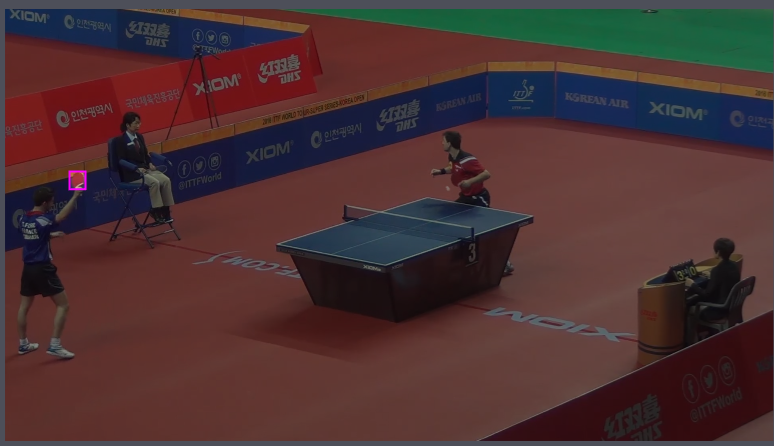

In [ ]:
from IPython.display import Image
import os
path1 = 'Images_annot√©es/'       

listing = os.listdir(path1)
for file in listing[:7]:
    #read the image
    im = Image(path1+ file,width=500, height=500)    
    #show image
    display(im)     

**Install conda and pytorch packages for computer vision :**

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()
!conda install pytorch torchvision cudatoolkit=11.3 -c pytorch

‚è¨ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
üì¶ Installing...
üìå Adjusting configuration...
ü©π Patching environment...
‚è≤ Done in 0:00:32
üîÅ Restarting kernel...
Solving environment: | failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ |

**Clone yolov5 repository from ultralytics:**

In [ ]:
!git clone https://github.com/ultralytics/yolov5  
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 14205, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 14205 (delta 88), reused 107 (delta 67), pack-reused 14060
Receiving objects: 100% (14205/14205), 13.61 MiB | 24.41 MiB/s, done.
Resolving deltas: 100% (9751/9751), done.
/content/yolov5



**Install requirements:**

In [ ]:
%pip install -qr requirements.txt 

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 182.5/182.5 kB 6.0 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 793.8/793.8 kB 21.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11.2/11.2 MB 50.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.9/60.9 MB 8.6 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 280.2/280.2 kB 17.1 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 596.3/596.3 kB 37.9 MB/s eta 0:00:00
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

**Import libraries:**

In [69]:
%cd yolov5
import torch
from yolov5 import utils
import torch
import utils
from IPython import display
from IPython.display import clear_output
from pathlib import Path
import yaml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob


%matplotlib inline
display = utils.notebook_init()

YOLOv5 üöÄ v7.0-10-g10c025d Python-3.7.15 torch-1.13.0 CPU


Setup complete ‚úÖ (2 CPUs, 12.7 GB RAM, 28.6/107.7 GB disk)


**Provide your dataset**:
**The following function will generate the data directories splited into train, val, test**. 

In [70]:
def create_data_directories(data_name):
    Path(f"../datasets/{data_name}/images/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/images/test").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/train").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/valid").mkdir(parents=True, exist_ok=True)
    Path(f"../datasets/{data_name}/labels/test").mkdir(parents=True, exist_ok=True)

    
create_data_directories('raquette_data')

**Le fichier raquette_data.yaml contient toutes les informations sur l'emplacement des donn√©es d'entra√Ænement, de validation et de test ainsi que le nombre de classes d'objets √† d√©tecter et leurs noms**.
**On a une seule classe ( raquette_noire-Flore)**.

In [75]:
!cat ../data/raquette_data.yaml
print ('---------------------------------------------')

train: ../datasets/raquette_data/images/train
val: ../datasets/raquette_data/images/valid
test: ../datasets/raquette_data/images/test

nc: 1
names: ['raquette_noire_Flore']
------------------------------------------------------------------------------------------


# **Training**

---
**Feature extraction**


In [82]:
!python train.py --batch 32 --epochs 150 --data 'data/raquette_data.yaml' --weights 'yolov5s6.pt' --project 'runs_raquette' --name 'feature_extraction' --cache --freeze 12



train: weights=yolov5s6.pt, cfg=, data=data/raquette_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs_raquette, name=feature_extraction, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[12], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ‚úÖ
YOLOv5 üöÄ v7.0-10-g10c025d Python-3.7.12 torch-1.13.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v

In [63]:
display.Image(f"runs_raquette/feature_extraction/results.png")

FileNotFoundError: ignored

FileNotFoundError: ignored

<IPython.core.display.Image object>